# Word embeddings usando Tensorflow


Fuentes y más información:
* https://medium.com/towards-data-science/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac
* https://www.tensorflow.org/get_started/mnist/beginners
* https://www.tensorflow.org/api_docs/python/tf/reduce_mean
* http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

Bibliotecas necesarias

In [1]:
import numpy as np
import tensorflow as tf


Corpus de trabajo.

In [2]:
corpus = 'La felicidad es solamente la ausencia del dolor . El hombre ha hecho de la Tierra un infierno para los animales . La vida es solo la muerte aplazada . Cada partida es una anticipacion de la muerte y cada encuentro una anticipacion de la resurreccion . A excepcion del hombre ningun ser se maravilla de su propia existencia . Ni tanto que queme al santo ni tanto que no lo alumbre . No todo el que trae levita es persona principal . Para uno que madruga hay otro que no se duerme . Crea fama y echate a dormir . De vez en cuando se aprende algo pero se olvida el dia entero . El destino es el que baraja las cartas pero nosotros los que las jugamos . La soledad es la suerte de todos los espiritus excelentes . Hay seres de los que no se concibe como llegan a caminar sobre dos piernas aunque eso no signifique mucho . Las religiones como las luciernagas necesitan de la oscuridad para brillar . No hay ningun viento favorable para el que no sabe a que puerto se dirige . Pocas veces pensamos en lo que tenemos pero siempre en lo que nos falta . Se dice que la maldad se expia en aquel mundo pero la estupidez se expia en este . Toda vida es sufrimiento . Los hombres vulgares solo piensan en como pasar el tiempo un hombre inteligente procura aprovecharlo '
corpus = corpus.lower()
print(corpus)

la felicidad es solamente la ausencia del dolor . el hombre ha hecho de la tierra un infierno para los animales . la vida es solo la muerte aplazada . cada partida es una anticipacion de la muerte y cada encuentro una anticipacion de la resurreccion . a excepcion del hombre ningun ser se maravilla de su propia existencia . ni tanto que queme al santo ni tanto que no lo alumbre . no todo el que trae levita es persona principal . para uno que madruga hay otro que no se duerme . crea fama y echate a dormir . de vez en cuando se aprende algo pero se olvida el dia entero . el destino es el que baraja las cartas pero nosotros los que las jugamos . la soledad es la suerte de todos los espiritus excelentes . hay seres de los que no se concibe como llegan a caminar sobre dos piernas aunque eso no signifique mucho . las religiones como las luciernagas necesitan de la oscuridad para brillar . no hay ningun viento favorable para el que no sabe a que puerto se dirige . pocas veces pensamos en lo qu

Se genera una lista de todas las palabras dentro del corpus.

In [3]:
stop_list = ['.']
words = [_ for _ in corpus.split() 
         if _ not in stop_list] # Se omiten los caracteres que estén en la lista de paro
print(words)

['la', 'felicidad', 'es', 'solamente', 'la', 'ausencia', 'del', 'dolor', 'el', 'hombre', 'ha', 'hecho', 'de', 'la', 'tierra', 'un', 'infierno', 'para', 'los', 'animales', 'la', 'vida', 'es', 'solo', 'la', 'muerte', 'aplazada', 'cada', 'partida', 'es', 'una', 'anticipacion', 'de', 'la', 'muerte', 'y', 'cada', 'encuentro', 'una', 'anticipacion', 'de', 'la', 'resurreccion', 'a', 'excepcion', 'del', 'hombre', 'ningun', 'ser', 'se', 'maravilla', 'de', 'su', 'propia', 'existencia', 'ni', 'tanto', 'que', 'queme', 'al', 'santo', 'ni', 'tanto', 'que', 'no', 'lo', 'alumbre', 'no', 'todo', 'el', 'que', 'trae', 'levita', 'es', 'persona', 'principal', 'para', 'uno', 'que', 'madruga', 'hay', 'otro', 'que', 'no', 'se', 'duerme', 'crea', 'fama', 'y', 'echate', 'a', 'dormir', 'de', 'vez', 'en', 'cuando', 'se', 'aprende', 'algo', 'pero', 'se', 'olvida', 'el', 'dia', 'entero', 'el', 'destino', 'es', 'el', 'que', 'baraja', 'las', 'cartas', 'pero', 'nosotros', 'los', 'que', 'las', 'jugamos', 'la', 'soledad

Se obtiene un conjunto sin repeticiones de todas las palabras del corpus.

In [4]:
words = set(words)
print(words)

{'dirige', 'principal', 'anticipacion', 'persona', 'alumbre', 'es', 'en', 'tanto', 'lo', 'resurreccion', 'soledad', 'cuando', 'vez', 'al', 'tiempo', 'aprovecharlo', 'destino', 'no', 'pasar', 'para', 'oscuridad', 'luciernagas', 'excepcion', 'pocas', 'falta', 'aquel', 'expia', 'cada', 'procura', 'trae', 'aunque', 'se', 'ni', 'caminar', 'religiones', 'piensan', 'propia', 'aplazada', 'olvida', 'dia', 'felicidad', 'un', 'llegan', 'sobre', 'el', 'toda', 'pensamos', 'solo', 'uno', 'madruga', 'que', 'y', 'ausencia', 'infierno', 'ningun', 'solamente', 'hombres', 'vulgares', 'tenemos', 'como', 'ser', 'algo', 'sabe', 'puerto', 'una', 'del', 'vida', 'viento', 'inteligente', 'echate', 'maravilla', 'duerme', 'mucho', 'dormir', 'otro', 'maldad', 'queme', 'eso', 'animales', 'la', 'sufrimiento', 'este', 'todos', 'su', 'veces', 'brillar', 'pero', 'partida', 'excelentes', 'seres', 'levita', 'fama', 'los', 'muerte', 'santo', 'dice', 'mundo', 'todo', 'crea', 'encuentro', 'estupidez', 'cartas', 'hecho', 'fa

Se les asigna una representación numérica a las palabras para que puedan ser interpretadas por la computadora.

In [5]:
word2int = {}
int2word = {}

vocab_size = len(words)

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
    
print(word2int['vida']) # Número correspondiente a la palabra 'libro'.
print(int2word[3])       # Palabra correspondiente al número 3.

66
persona


* Se obtiene  una lista de frases del corpus.
* Se obtiene una lista de cada frase del corpus.

In [6]:
raw_sentences = corpus.split('.')

print(raw_sentences)
sentences = [_.split() for _ in raw_sentences]
print(sentences)


['la felicidad es solamente la ausencia del dolor ', ' el hombre ha hecho de la tierra un infierno para los animales ', ' la vida es solo la muerte aplazada ', ' cada partida es una anticipacion de la muerte y cada encuentro una anticipacion de la resurreccion ', ' a excepcion del hombre ningun ser se maravilla de su propia existencia ', ' ni tanto que queme al santo ni tanto que no lo alumbre ', ' no todo el que trae levita es persona principal ', ' para uno que madruga hay otro que no se duerme ', ' crea fama y echate a dormir ', ' de vez en cuando se aprende algo pero se olvida el dia entero ', ' el destino es el que baraja las cartas pero nosotros los que las jugamos ', ' la soledad es la suerte de todos los espiritus excelentes ', ' hay seres de los que no se concibe como llegan a caminar sobre dos piernas aunque eso no signifique mucho ', ' las religiones como las luciernagas necesitan de la oscuridad para brillar ', ' no hay ningun viento favorable para el que no sabe a que puer

Se obtienen las palabras vecinas con una ventana de 2 para después usarlas como datos de entrenamiento.

In [7]:
data = []

WINDOW_SIZE = 2

for sentence in sentences:
    for word_index,word in enumerate(sentence):
        for neighbor_word in sentence[max(word_index - WINDOW_SIZE,0):
                                      min(word_index + WINDOW_SIZE,len(sentence) + 1)]:
            if neighbor_word != word:
                data.append([word,neighbor_word])

print(data)

[['la', 'felicidad'], ['felicidad', 'la'], ['felicidad', 'es'], ['es', 'la'], ['es', 'felicidad'], ['es', 'solamente'], ['solamente', 'felicidad'], ['solamente', 'es'], ['solamente', 'la'], ['la', 'es'], ['la', 'solamente'], ['la', 'ausencia'], ['ausencia', 'solamente'], ['ausencia', 'la'], ['ausencia', 'del'], ['del', 'la'], ['del', 'ausencia'], ['del', 'dolor'], ['dolor', 'ausencia'], ['dolor', 'del'], ['el', 'hombre'], ['hombre', 'el'], ['hombre', 'ha'], ['ha', 'el'], ['ha', 'hombre'], ['ha', 'hecho'], ['hecho', 'hombre'], ['hecho', 'ha'], ['hecho', 'de'], ['de', 'ha'], ['de', 'hecho'], ['de', 'la'], ['la', 'hecho'], ['la', 'de'], ['la', 'tierra'], ['tierra', 'de'], ['tierra', 'la'], ['tierra', 'un'], ['un', 'la'], ['un', 'tierra'], ['un', 'infierno'], ['infierno', 'tierra'], ['infierno', 'un'], ['infierno', 'para'], ['para', 'un'], ['para', 'infierno'], ['para', 'los'], ['los', 'infierno'], ['los', 'para'], ['los', 'animales'], ['animales', 'para'], ['animales', 'los'], ['la', 'vid

Función que obtiene la representación one hot vector de un número.

In [8]:
def one_hot_vector(data_index,vocab_size):
    ohv = np.zeros(vocab_size)
    ohv[data_index] = 1
    return ohv

Se obtienen one hot vectors de la lista de palabras de entrenamiento.

In [9]:
x_train = [(one_hot_vector(word2int[data_word[0]],vocab_size)) for data_word in data ] # input word
y_train = [(one_hot_vector(word2int[data_word[1]],vocab_size)) for data_word in data ] # output word

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print(x_train.shape, y_train.shape)

(599, 127) (599, 127)


# Tensorflow model

In [10]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

* Se declara la matriz de pesos, bias.
* La variable `hidden_representation` es el word embedding y se define como:

    $h = x*W_1 + bias$

In [11]:
EMBEDDING_DIM = 5 # Dimensión de los words embeddings

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)



Se declaran variables para realizar la conversión de word embeddings a vectores del tamaño del vocabulario.
De los word embeddings se regresa a un vector de probabilidades de dimensión del vocabulario y con la función de softmax se hace una predicción de las palabras vecinas de una palabra en específico.

In [12]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# Training

In [13]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init)

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 12000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    if not _ % 2000:
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))
    
    
    

loss is :  8.36907
loss is :  3.92689
loss is :  3.47248
loss is :  3.1598
loss is :  2.93379
loss is :  2.77748


In [14]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ -7.57599890e-01  -1.83141768e+00  -7.69361317e-01   3.29527885e-01
   -6.87218368e-01]
 [  1.64565539e+00  -8.04881215e-01   2.24321231e-01  -1.23828471e+00
    7.52113089e-02]
 [  2.53728175e+00   1.23740458e+00  -1.16766775e+00  -1.05888402e+00
   -1.59568119e+00]
 [  2.08566523e+00  -1.64172304e+00  -3.29135776e-01  -2.26325083e+00
    1.44647133e+00]
 [ -1.05287075e+00  -1.53547525e+00  -2.77446151e-01   1.95065188e+00
   -8.93108964e-01]
 [  1.21294260e+00  -1.57801330e-01  -6.08570218e-01  -2.94063687e+00
    1.70647407e+00]
 [ -7.54628658e-01  -1.97608415e-02   9.11519825e-01   6.76207781e-01
   -1.92941213e+00]
 [  2.36694264e+00  -7.41284132e-01   2.16622138e+00   2.09933829e+00
    1.44378603e+00]
 [ -1.78494608e+00  -1.62826374e-01   1.00678134e+00   2.29408526e+00
   -5.24324000e-01]
 [  7.00286686e-01   6.68499947e-01  -1.04752517e+00  -2.49162957e-01
   -5.14740407e-01]
 [  1.39276981e+00   6.87865615e-01  -2.80670494e-01  -9.69201922e-01
    3.21898013e-02]
 [ -5.4561

Lo importante del entrenamiento no es tanto la certeza de predicción sino los valores de los word embeddings.

Word embeddings + bias

In [15]:
vectors = sess.run(W1 + b1)
print(vectors)

[[ -5.13257921e-01  -2.33254671e+00  -1.94713354e-01   4.00009573e-01
   -7.21683145e-01]
 [  1.88999736e+00  -1.30601013e+00   7.98969209e-01  -1.16780305e+00
    4.07465138e-02]
 [  2.78162360e+00   7.36275673e-01  -5.93019783e-01  -9.88402367e-01
   -1.63014603e+00]
 [  2.33000708e+00  -2.14285183e+00   2.45512187e-01  -2.19276905e+00
    1.41200650e+00]
 [ -8.08528781e-01  -2.03660417e+00   2.97201812e-01   2.02113366e+00
   -9.27573740e-01]
 [  1.45728457e+00  -6.58930242e-01  -3.39222550e-02  -2.87015510e+00
    1.67200923e+00]
 [ -5.10286689e-01  -5.20889759e-01   1.48616779e+00   7.46689439e-01
   -1.96387696e+00]
 [  2.61128449e+00  -1.24241304e+00   2.74086928e+00   2.16982007e+00
    1.40932119e+00]
 [ -1.54060411e+00  -6.63955271e-01   1.58142924e+00   2.36456704e+00
   -5.58788776e-01]
 [  9.44628656e-01   1.67371035e-01  -4.72877204e-01  -1.78681269e-01
   -5.49205184e-01]
 [  1.63711178e+00   1.86736703e-01   2.93977469e-01  -8.98720264e-01
   -2.27499381e-03]
 [ -3.0127

Word embedding de `libro`

In [16]:
print(vectors[ word2int['vida'] ])

[ 1.72607827  0.22859395  0.7405321  -1.52551389  0.37377375]


# Gráficas

Para reducción de dimensionalidad y poder mostrar en una gráfica 2D.

In [17]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=42)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)


In [18]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

dirige [ 0.43382173 -0.90099873]
principal [ 0.97792407 -0.20896056]
anticipacion [-0.22621365  0.97407771]
persona [ 0.96162539  0.27436583]
alumbre [-0.13219212 -0.99122411]
es [ 0.98817887  0.1533053 ]
en [-0.84893335 -0.52849992]
tanto [-0.63482035 -0.77265977]
lo [-0.68269008 -0.73070805]
resurreccion [-0.66962001  0.74270387]
soledad [-0.83737196 -0.54663351]
cuando [-0.51808623  0.85532839]
vez [ 0.13602017 -0.99070607]
al [-0.92409305 -0.38216755]
tiempo [ 0.88688934 -0.46198193]
aprovecharlo [-0.36015682  0.93289178]
destino [ 0.69774704 -0.71634424]
no [-0.69928353  0.71484442]
pasar [-0.60611697 -0.79537552]
para [-0.94285849  0.33319343]
oscuridad [-0.93681967  0.34981266]
luciernagas [ 0.17511885  0.9845473 ]
excepcion [-0.47476511 -0.88011255]
pocas [ 0.8995131  -0.43689379]
falta [ 0.05593494  0.99843442]
aquel [-0.004075  -0.9999917]
expia [-0.36250643  0.93198127]
cada [ 0.34897626 -0.93713157]
procura [-0.03186708  0.99949212]
trae [-0.99968727  0.02500737]
aunque [ 0

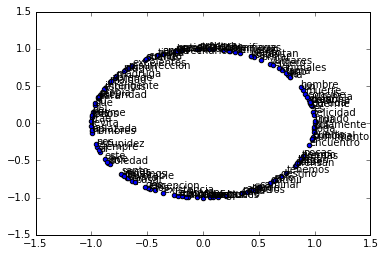

In [19]:


import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    plt.scatter(vectors[word2int[word]][0],vectors[word2int[word]][1])
    
plt.savefig('w2v')
plt.show()